# Analysis of DeepSeek vs. ChatGPT Dataset

This notebook presents an analysis of the "DeepSeek vs. ChatGPT: AI Performance & User Behavior Dataset." The dataset offers insights into user engagement, AI accuracy, response speed, and adoption trends for both ChatGPT and DeepSeek platforms.

For a comprehensive overview of the dataset, including its features and structure, please refer to the [GitHub repository](https://github.com/Smartlyfe21).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("drive/MyDrive/DeepSeek Vs ChatGpt/deepseek_vs_chatgpt.csv")

In [4]:
df.head()

,Date,Month_Num,Weekday,AI_Platform,AI_Model_Version,Active_Users,New_Users,Churned_Users,Daily_Churn_Rate,Retention_Rate,...,Session_Duration_sec,Device_Type,Language,Response_Accuracy,Response_Speed_sec,Response_Time_Category,Correction_Needed,User_Return_Frequency,Customer_Support_Interactions,Region
0,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,40,Mobile,es,0.7842,3.30,Standard,0,6,2,Antarctica (the territory South of 60 deg S)
1,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,24,Laptop/Desktop,zh,0.8194,3.28,Standard,1,2,2,Ukraine
2,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,34,Mobile,en,0.8090,3.07,Standard,0,2,0,Grenada
3,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,18,Mobile,fr,0.8233,3.06,Standard,0,9,0,Guyana
4,2024-05-16,5,Thursday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,...,10,Mobile,de,0.9366,1.48,Fast,0,9,3,India


In [5]:
df.tail()

,Date,Month_Num,Weekday,AI_Platform,AI_Model_Version,Active_Users,New_Users,Churned_Users,Daily_Churn_Rate,Retention_Rate,...,Session_Duration_sec,Device_Type,Language,Response_Accuracy,Response_Speed_sec,Response_Time_Category,Correction_Needed,User_Return_Frequency,Customer_Support_Interactions,Region
9995,2024-05-17,5,Friday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,...,34,Laptop/Desktop,zh,0.9791,0.60,Instant,0,7,2,Seychelles
9996,2024-05-17,5,Friday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,...,19,Laptop/Desktop,en,0.9132,0.83,Instant,0,5,0,Christmas Island
9997,2024-05-17,5,Friday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,...,29,Laptop/Desktop,de,0.9516,0.94,Instant,0,10,2,Ethiopia
9998,2024-05-17,5,Friday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,...,21,Mobile,de,0.9359,0.83,Instant,0,5,3,Puerto Rico
9999,2024-05-17,5,Friday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,...,58,Mobile,fr,0.9399,0.76,Instant,1,7,1,Kyrgyz Republic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           10000 non-null  object 
 1   Month_Num                      10000 non-null  int64  
 2   Weekday                        10000 non-null  object 
 3   AI_Platform                    10000 non-null  object 
 4   AI_Model_Version               10000 non-null  object 
 5   Active_Users                   10000 non-null  int64  
 6   New_Users                      10000 non-null  int64  
 7   Churned_Users                  10000 non-null  int64  
 8   Daily_Churn_Rate               10000 non-null  float64
 9   Retention_Rate                 10000 non-null  float64
 10  User_ID                        10000 non-null  object 
 11  Query_Type                     10000 non-null  object 
 12  Input_Text                     10000 non-null  

In [7]:
df.dtypes

,0
Date,object
Month_Num,int64
Weekday,object
AI_Platform,object
AI_Model_Version,object
Active_Users,int64
New_Users,int64
Churned_Users,int64
Daily_Churn_Rate,float64
Retention_Rate,float64


In [10]:
df.isnull().sum()

,0
Date,0
Month_Num,0
Weekday,0
AI_Platform,0
AI_Model_Version,0
Active_Users,0
New_Users,0
Churned_Users,0
Daily_Churn_Rate,0
Retention_Rate,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(10000, 28)

In [13]:
df.drop('Response_Accuracy', axis=1, inplace=True)

In [14]:
df.columns

Index(['Date', 'Month_Num', 'Weekday', 'AI_Platform', 'AI_Model_Version',
       'Active_Users', 'New_Users', 'Churned_Users', 'Daily_Churn_Rate',
       'Retention_Rate', 'User_ID', 'Query_Type', 'Input_Text',
       'Input_Text_Length', 'Response_Tokens', 'Topic_Category', 'User_Rating',
       'User_Experience_Score', 'Session_Duration_sec', 'Device_Type',
       'Language', 'Response_Speed_sec', 'Response_Time_Category',
       'Correction_Needed', 'User_Return_Frequency',
       'Customer_Support_Interactions', 'Region'],
      dtype='object')

In [15]:
df.describe(include="all")

,Date,Month_Num,Weekday,AI_Platform,AI_Model_Version,Active_Users,New_Users,Churned_Users,Daily_Churn_Rate,Retention_Rate,...,User_Experience_Score,Session_Duration_sec,Device_Type,Language,Response_Speed_sec,Response_Time_Category,Correction_Needed,User_Return_Frequency,Customer_Support_Interactions,Region
count,10000,10000.000000,10000,10000,10000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,...,10000.000000,10000.000000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000
unique,467,NaN,7,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,5,NaN,3,NaN,NaN,NaN,243
top,2024-06-05,NaN,Friday,ChatGPT,GPT-4-turbo,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mobile,de,NaN,Fast,NaN,NaN,NaN,Korea
freq,86,NaN,1677,5076,5076,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5034,2057,NaN,4883,NaN,NaN,NaN,95
mean,NaN,7.128900,NaN,NaN,NaN,1.196255e+06,100508.750000,35395.150000,0.035228,9.500000e-01,...,1.626706,28.533700,NaN,NaN,2.356651,NaN,0.144600,5.530600,1.476800,NaN
std,NaN,3.559712,NaN,NaN,NaN,7.444465e+05,85584.077151,14849.189585,0.014999,1.054765e-14,...,0.491296,14.090348,NaN,NaN,1.303743,NaN,0.351715,2.867906,1.120887,NaN
min,NaN,1.000000,NaN,NaN,NaN,2.000000e+05,12500.000000,4000.000000,0.020000,9.500000e-01,...,0.480000,5.000000,NaN,NaN,0.330000,NaN,0.000000,1.000000,0.000000,NaN
25%,NaN,4.000000,NaN,NaN,NaN,6.500000e+05,35000.000000,25000.000000,0.020000,9.500000e-01,...,1.230000,17.000000,NaN,NaN,1.250000,NaN,0.000000,3.000000,0.000000,NaN
50%,NaN,8.000000,NaN,NaN,NaN,9.500000e+05,52500.000000,35000.000000,0.050000,9.500000e-01,...,1.710000,27.000000,NaN,NaN,2.070000,NaN,0.000000,6.000000,1.000000,NaN
75%,NaN,10.000000,NaN,NaN,NaN,1.700000e+06,170000.000000,49000.000000,0.050000,9.500000e-01,...,2.070000,38.000000,NaN,NaN,3.450000,NaN,0.000000,8.000000,2.000000,NaN


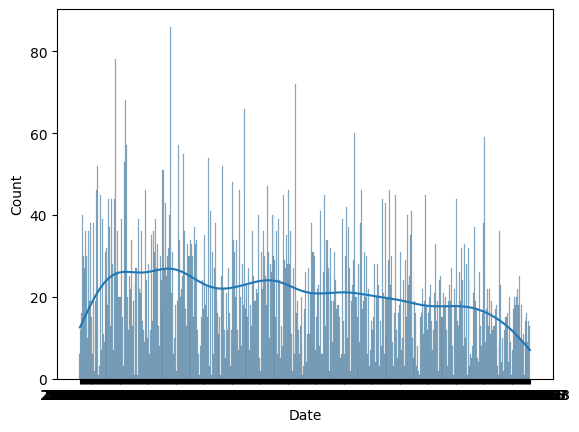

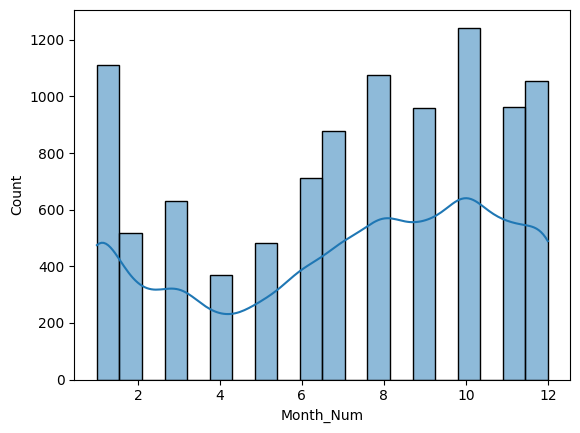

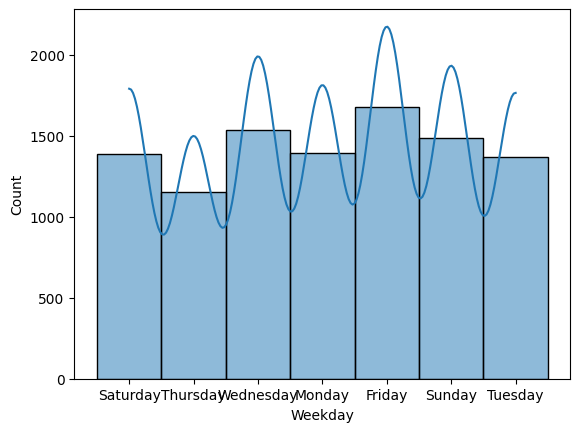

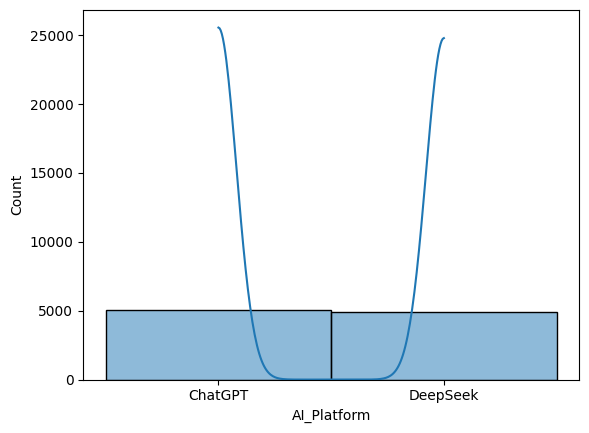

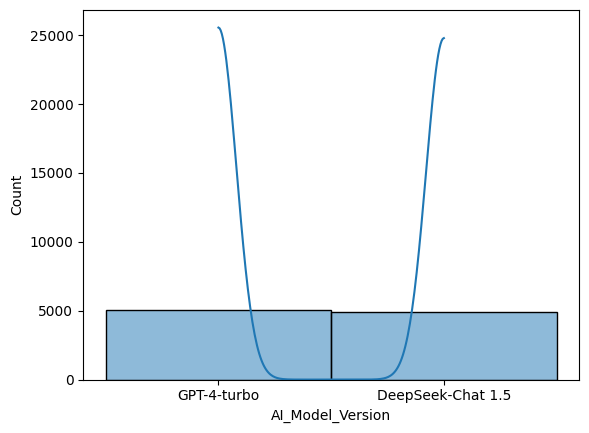

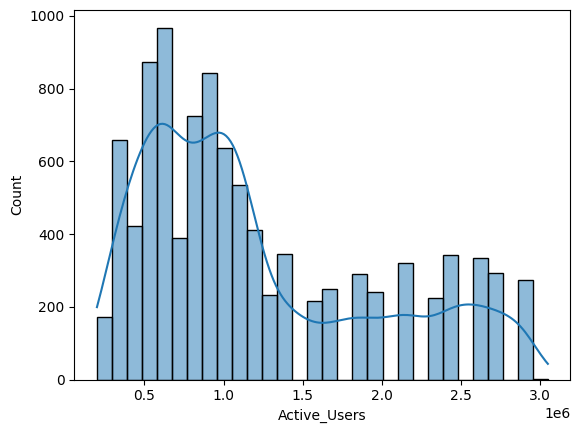

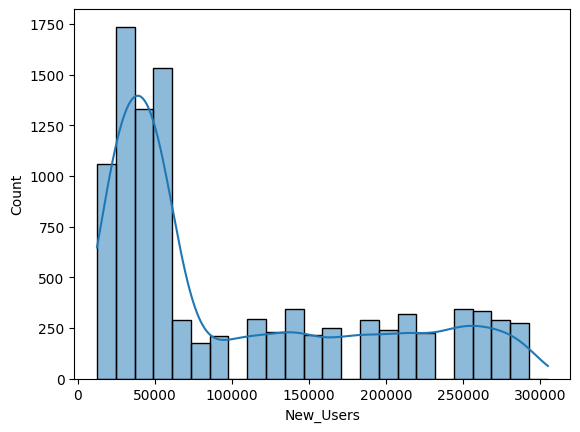

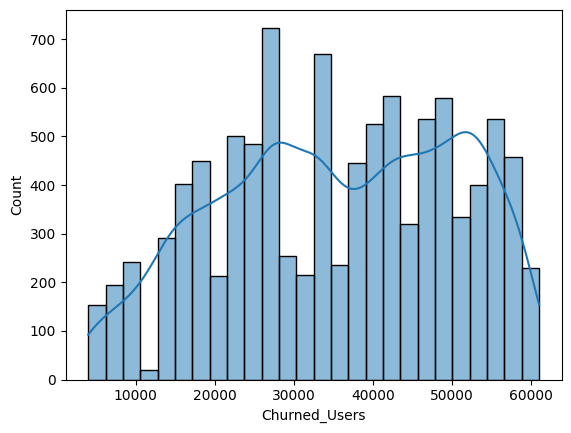

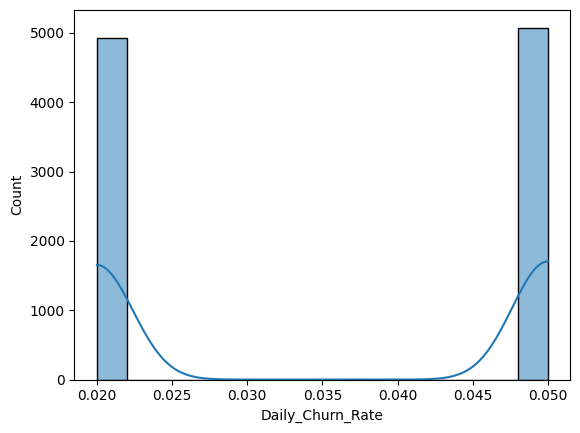

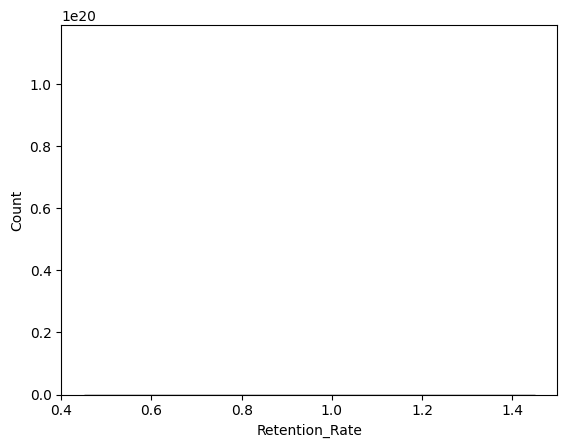

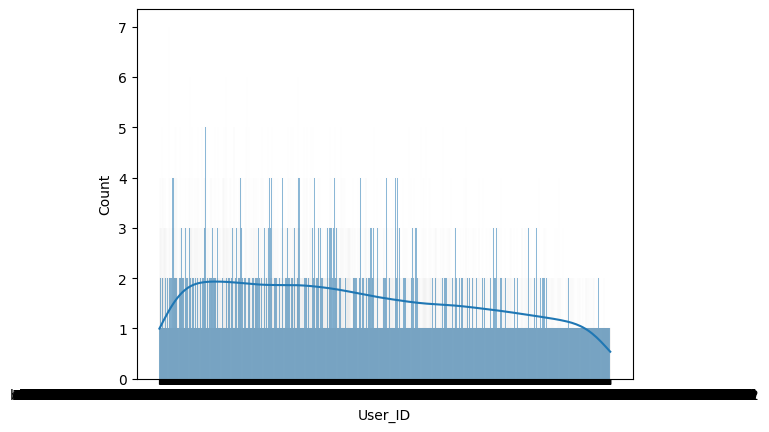

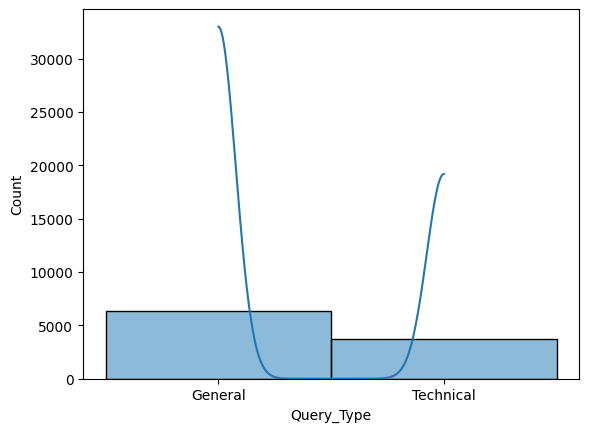

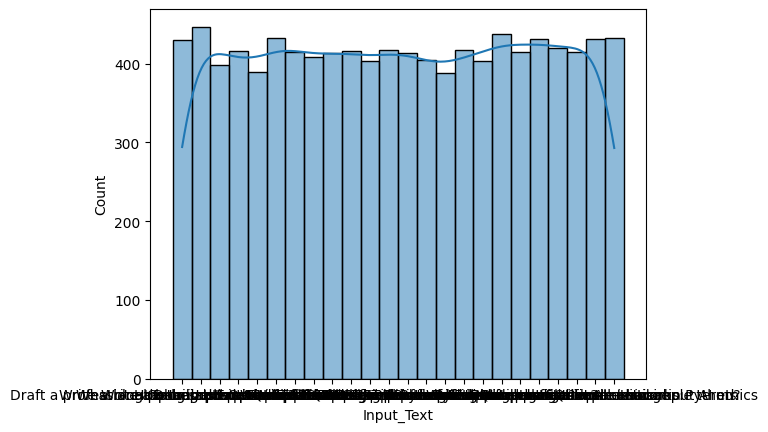

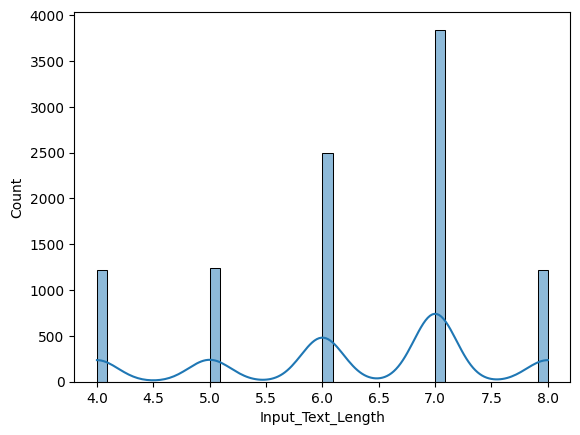

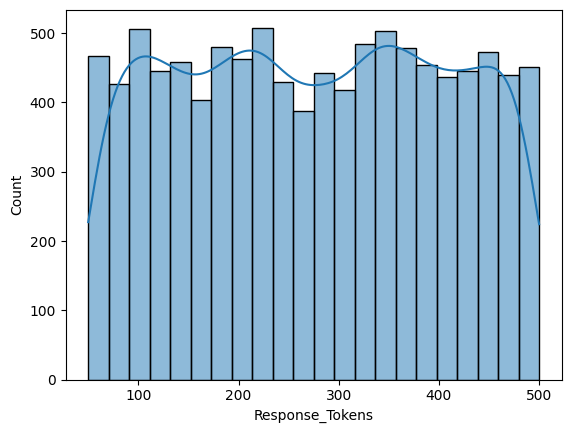

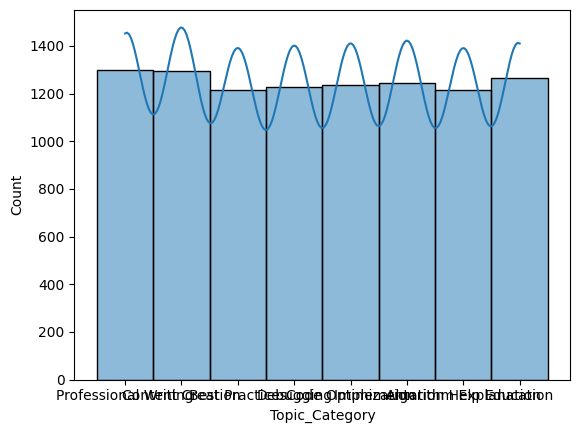

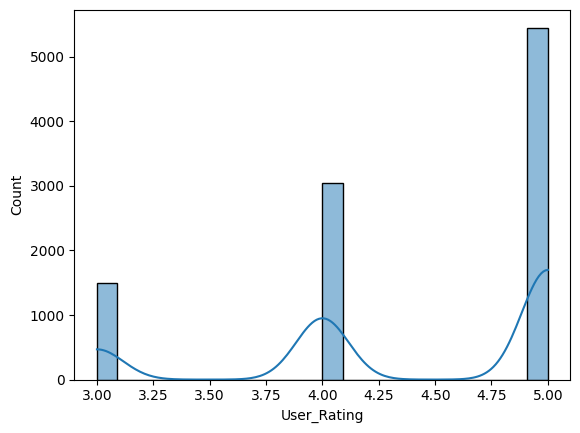

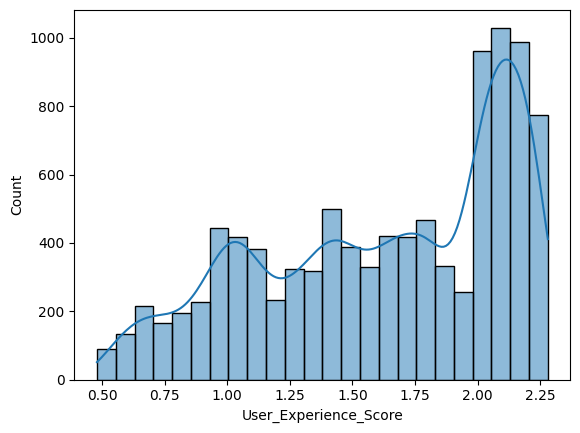

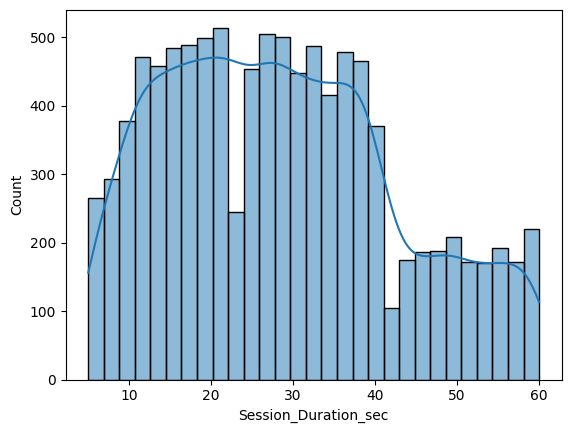

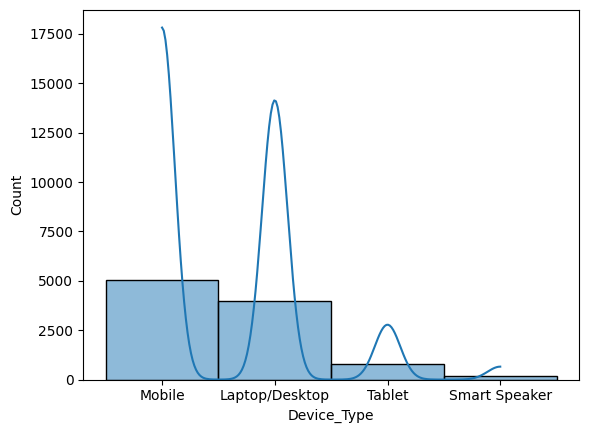

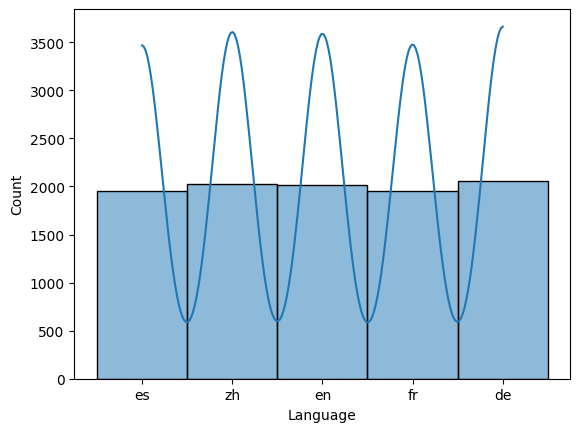

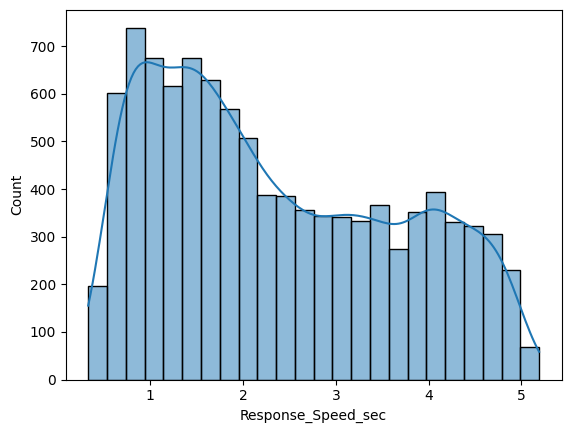

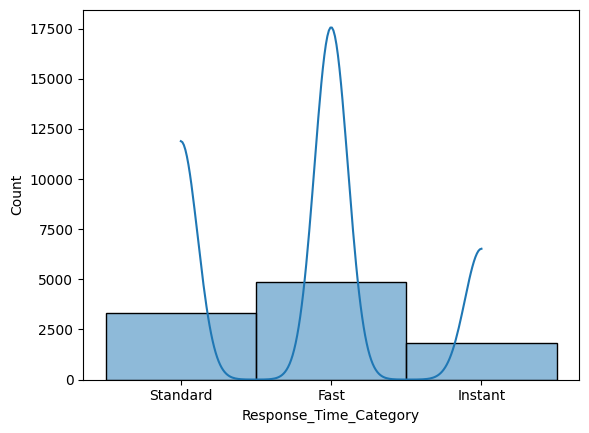

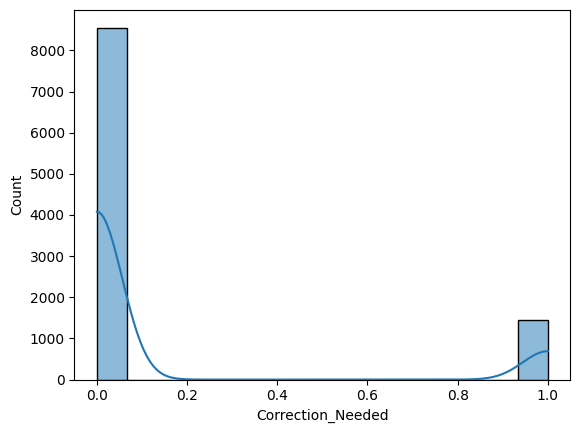

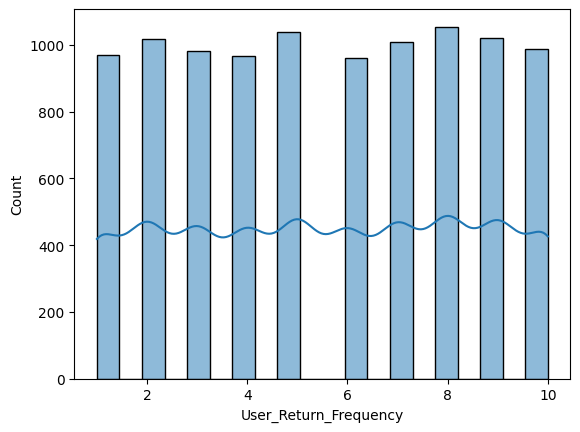

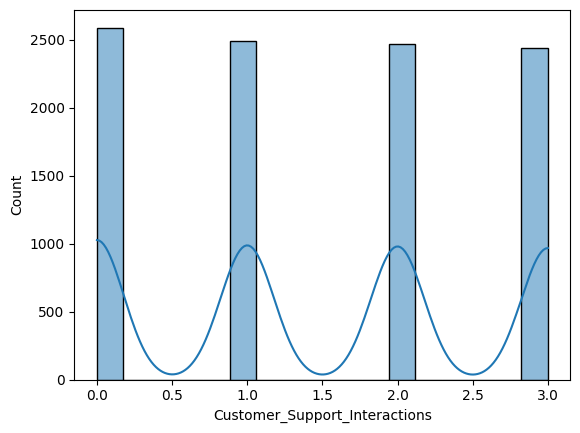

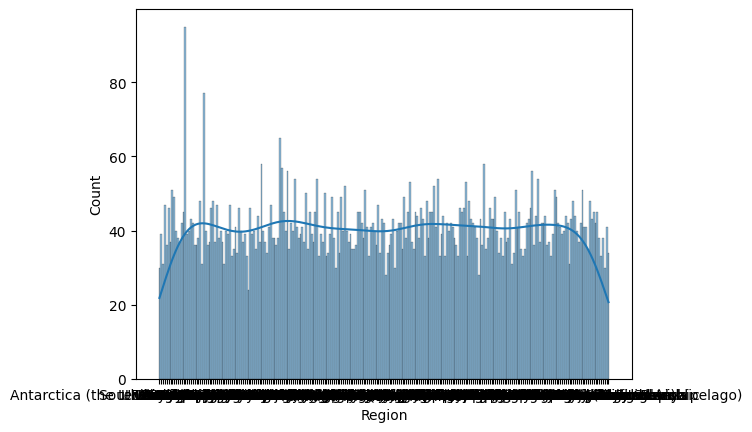

In [16]:
for col in df:
  sns.histplot(df[col], kde=True)
  plt.show()

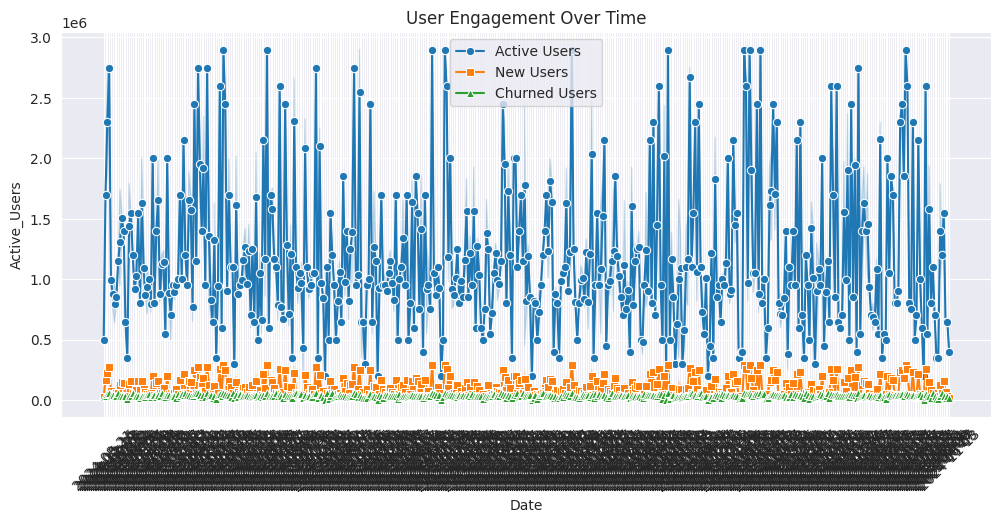

In [17]:
#Trend of active users over time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='Active_Users', label='Active Users', marker='o')
sns.lineplot(data=df, x='Date', y='New_Users', label='New Users', marker='s')
sns.lineplot(data=df, x='Date', y='Churned_Users', label='Churned Users', marker='^')
plt.xticks(rotation=45)
plt.title("User Engagement Over Time")
plt.legend()
plt.show()

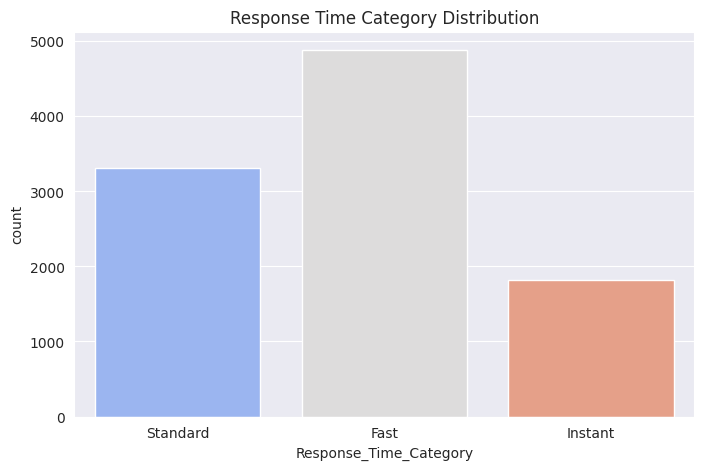

In [19]:
# Distribution of Response Speed Categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Response_Time_Category', palette='coolwarm')
plt.title("Response Time Category Distribution")
plt.show()


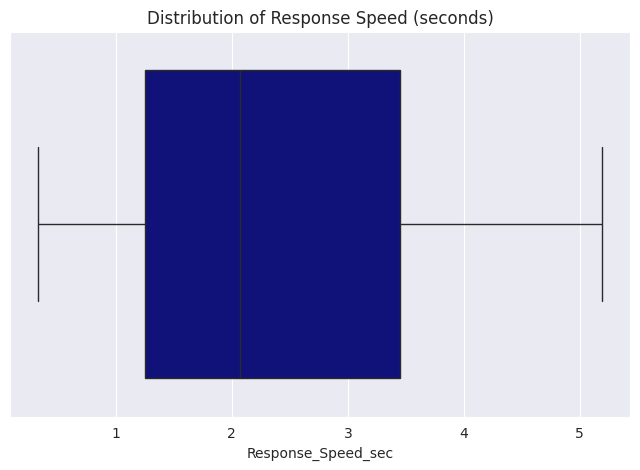

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Response_Speed_sec', color='darkblue')
plt.title("Distribution of Response Speed (seconds)")
plt.show()



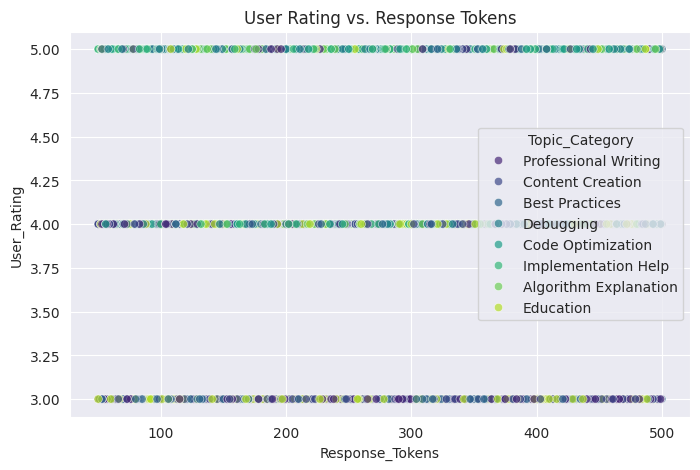

In [24]:
#
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Response_Tokens', y='User_Rating', hue='Topic_Category', palette='viridis', alpha=0.7)
plt.title("User Rating vs. Response Tokens")
plt.show()

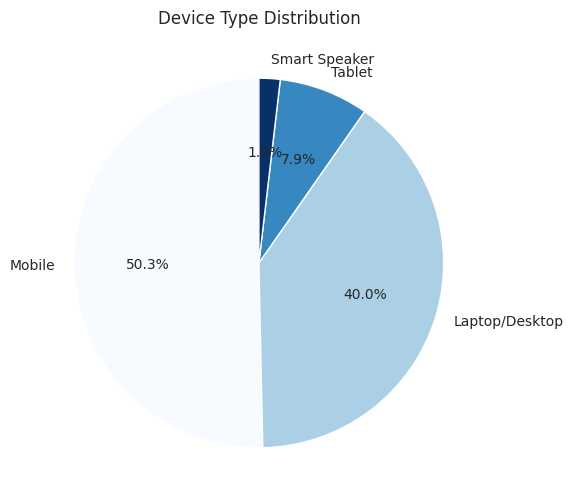

In [25]:
# 5. Pie Chart for Device Type Usage
plt.figure(figsize=(6, 6))
df['Device_Type'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Blues', startangle=90)
plt.title("Device Type Distribution")
plt.ylabel('')
plt.show()

**Heat Map:** Region-wise Correlation.

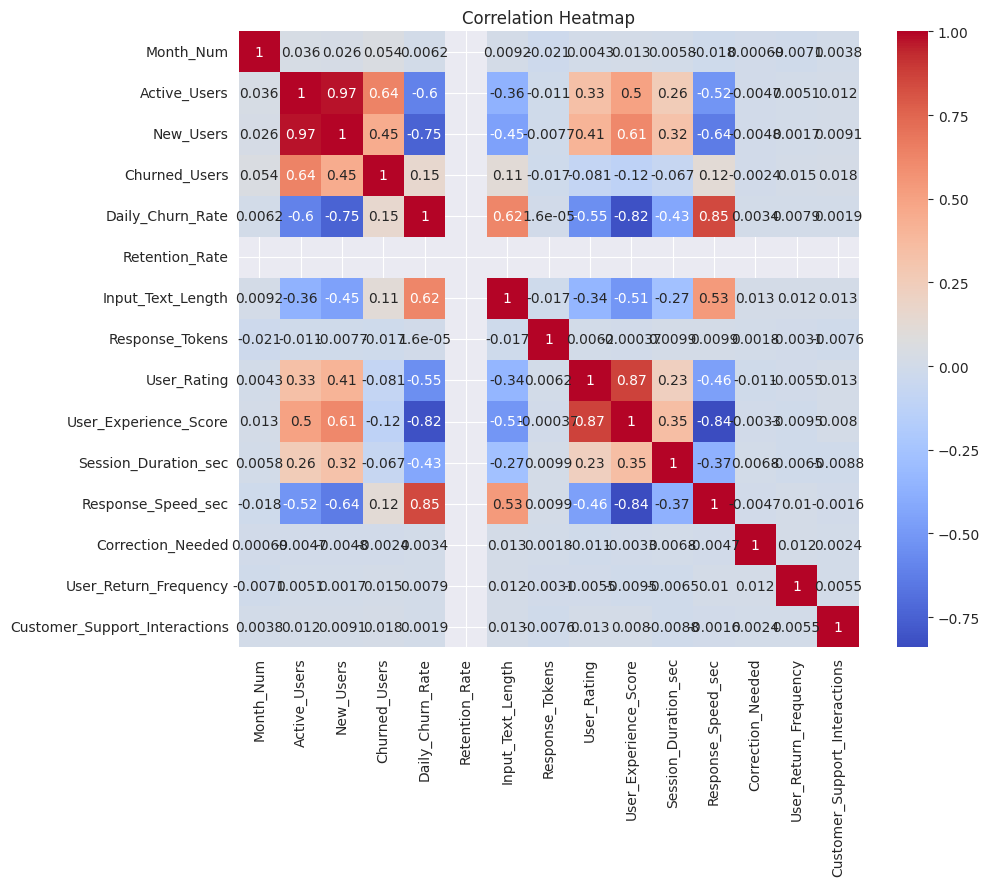

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


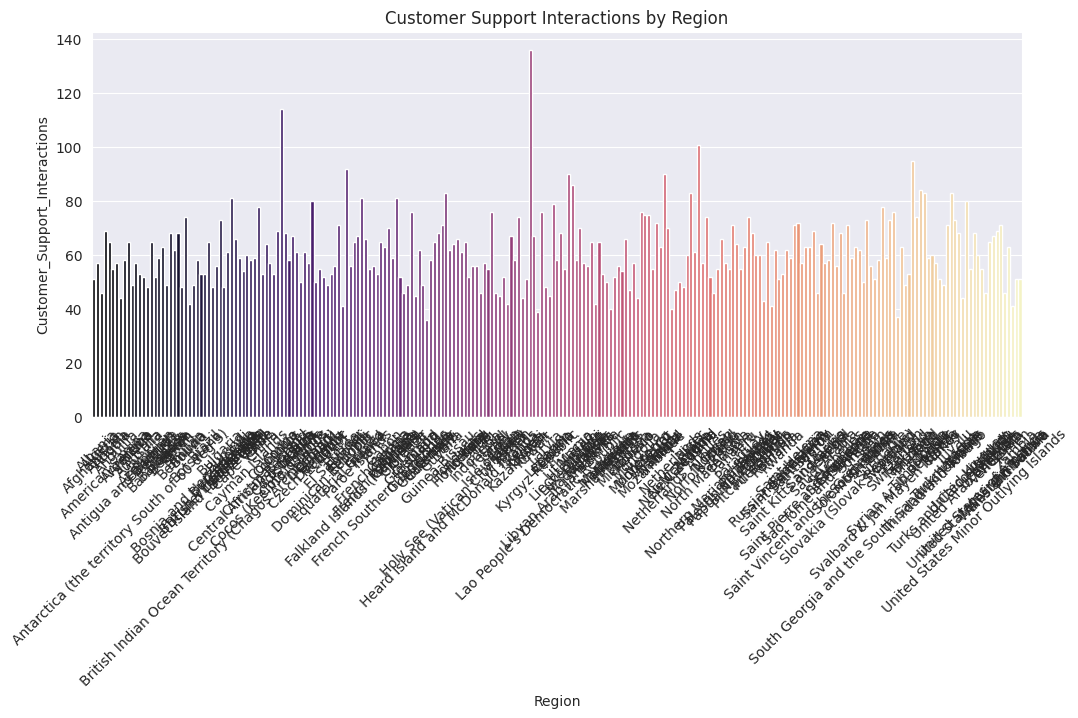

In [27]:
 #Heatmap: Region-wise Customer Support Interactions
plt.figure(figsize=(12, 5))
region_counts = df.groupby('Region')['Customer_Support_Interactions'].sum().reset_index()
sns.barplot(data=region_counts, x='Region', y='Customer_Support_Interactions', palette='magma')
plt.xticks(rotation=45)
plt.title("Customer Support Interactions by Region")
plt.show()

###Predictive Modeling.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor


In [57]:
#Feature selection
feature_cols = ['Active_Users', 'New_Users', 'Churned_Users', 'Input_Text_Length', 'Response_Tokens',
                'User_Rating', 'Session_Duration_sec', 'Correction_Needed', 'User_Return_Frequency',
                'Customer_Support_Interactions']

In [58]:
#Keep relevant columns only
feature_cols = [col for col in feature_cols if col in df.columns]
model_df = df.dropna(subset=feature_cols + ['Retention_Rate'])

In [59]:
#Define feature x and target variable y
X = model_df[feature_cols]
y = model_df['Retention_Rate']
#split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}


In [61]:
# Store results
results = []

In [62]:
# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    results.append({"Model": name, "R2 Score": r2, "MAE": mae})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

**Visualization:** Model Comparison.

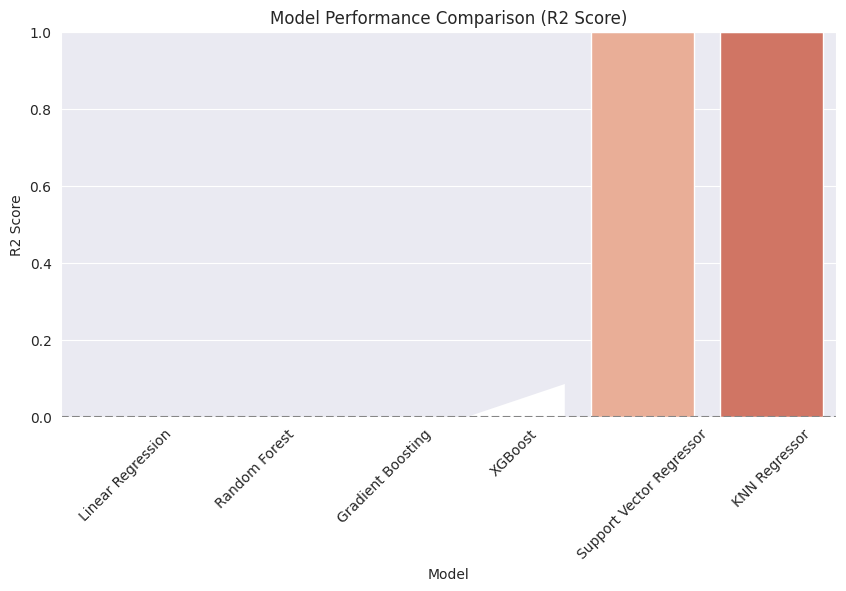

In [63]:
#Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="coolwarm")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Model Performance Comparison (R2 Score)")
plt.ylim(0, 1)  # R2 Score ranges from 0 to 1
plt.xticks(rotation=45)
plt.show()

In [51]:
# Print results
print(results_df.sort_values(by="R2 Score", ascending=False))

                      Model      R2 Score           MAE
4  Support Vector Regressor  1.000000e+00  0.000000e+00
5             KNN Regressor  1.000000e+00  0.000000e+00
0         Linear Regression  0.000000e+00  2.220446e-16
2         Gradient Boosting  0.000000e+00  2.220446e-16
1             Random Forest -6.120075e+01  1.503242e-15
3                   XGBoost -2.882304e+15  1.192093e-08


###Training & Evaluating each model

In [52]:
# Train and  evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Compute metrics
    r2 = r2_score(y_test, y_pred) * 100  # Convert to percentage
    mae = mean_absolute_error(y_test, y_pred) * 100  # Convert to percentage

    # Store results
    results.append({"Model": name, "R2 Score (%)": r2, "MAE (%)": mae})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results in Markdown format
import markdown
markdown_text = "### Model Performance Results\n"
markdown_text += "| Model | R2 Score (%) | MAE (%) |\n|---|---|---|\n"

for index, row in results_df.iterrows():
    markdown_text += f"| {row['Model']} | {row['R2 Score (%)']:.2f}% | {row['MAE (%)']:.2f}% |\n"

print(markdown_text)  # Prints markdown table

### Model Performance Results
| Model | R2 Score (%) | MAE (%) |
|---|---|---|
| Linear Regression | nan% | nan% |
| Random Forest | nan% | nan% |
| Gradient Boosting | nan% | nan% |
| XGBoost | nan% | nan% |
| Support Vector Regressor | nan% | nan% |
| KNN Regressor | nan% | nan% |
| Linear Regression | 0.00% | 0.00% |
| Random Forest | -6120.07% | 0.00% |
| Gradient Boosting | 0.00% | 0.00% |
| XGBoost | -288230374004227936.00% | 0.00% |
| Support Vector Regressor | 100.00% | 0.00% |
| KNN Regressor | 100.00% | 0.00% |

